Primeiramente vamos observar a questao a ser analisada, temos a cesso a duas basese de dados que contem caracetriticas a respeito de caminhoes. O objetivo é treinar um algoritimo para que ele seja capaz de classificar determinado caminhão como pos(defeito no sistema de ar) ou neg(sem defeito no sistema de ar).

devemos notar que temos tres casos:

-se um caminhão for enviado para manutenção e ele não apresentar defeito no sistema de ar:

sera cobrado 10 dolares

-se ele for enviado e apresentar problema so sistema de ar sera cobrado 25 dolares

-se um caminhao com problema no sistema de ar nao for enviado para manutencaçao diretamente ele custara 500 dolares.

logo podemos concluir que se por um lado um caminhão sem problema no sistema de ar gastara 10 dolares sem necessidade, por outro pode ser melhor doque correr o risco de determinado caminhao ter o defeito e nao ser enviado para manutençao o que custara mais.

ou seja se a empressa desseja reduzir os custos de manutençao devemos nos focar em detectar principalemte os casos verdadeiros de 'pos' em detrimento dos demais valores na matriz de confusão.

isso sera abordado mais a frente nesse projeto.



um falso negativo ou seja classificado como falso mas que na verdade é positivo pode custar caro para a empresa por tanto devemos escolher um modelo que tenha boas taxas de verdadeiro positivo e baixas taxas de falso negativo como prioridade.

In [ ]:
import pandas as pd


file_path = "/content/sample_data/air_system_previous_years.csv"


df = pd.read_csv(file_path)

df0=pd.read_csv("/content/sample_data/air_system_present_year.csv")

# Display the first few rows of the DataFrame
print(df.head())


  class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  

In [ ]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


notei que alguns valores da base estao ausentes.Vamos trata-los a serguir.

In [ ]:
# Verifique se cada valor é igual a "na"
valores_na = df.applymap(lambda x: x == 'na')

# Conte os "True" (valores "na") em cada coluna
contagem_por_coluna = valores_na.sum()

print("Contagem de valores 'na' por coluna:")
print(contagem_por_coluna)

Contagem de valores 'na' por coluna:
class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Create a copy of the DataFrame
df_copy = df.copy()

# Replace all occurrences of 'na' with NaN
df_copy.replace('na', np.nan, inplace=True)

# Print the modified DataFrame
print(df_copy)


      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002    NaN         664    186      0      0      0      0   
59996   neg    2286    NaN  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292    NaN  2130706432    494      0      0      0      0   
59999   neg   40222    NaN         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_0

agora que os valores na foram devidamente convertidos em NAN podemos lidar com eles:

In [ ]:
temp = df_copy['class']
df_copy.drop('class', axis=1, inplace=True)
df_copy



,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,NaN,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,NaN,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,NaN,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [ ]:
temp

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [ ]:
porcentagem_pos = temp.value_counts(normalize=True)["pos"] * 100
print(f"Porcentagem de pos em temp: {porcentagem_pos:.2f}%")


Porcentagem de pos em temp: 1.67%


De modo a evitar alterar a distribuição real dos dados optei por remover os conjuntos que contavam com valores NAN da base de dados.Entretanto outras abordagens pode ser avaliadas.

In [ ]:
df_copy = df_copy.dropna()


In [ ]:
df_copy

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0,784,740,0,0,0,0,0,20386,...,798872,112724,51736,7054,6628,27600,2,2,0,0
179,97000,0,378,160,0,0,0,0,0,84938,...,1078982,313334,511330,552328,871528,871104,1980,42,0,0
225,124656,2,278,170,0,0,0,0,0,194792,...,1205696,866148,697610,700400,1900386,437532,3680,0,0,0
394,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
413,43482,0,1534,1388,0,0,0,0,40024,493856,...,497196,121166,202272,232636,645690,50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,118028,0,740,714,618,690,0,0,0,85844,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
59562,229916,0,616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59843,224084,0,912,766,0,0,0,0,0,82260,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
59870,197332,0,658,616,216,346,0,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [ ]:
import pandas as pd

# Calculate the mean, median, and standard deviation of ag_002 in df_copy
mean = df_copy['ag_002'].astype(float).mean()
median = df_copy['ag_002'].astype(float).median()
std = df_copy['ag_002'].astype(float).std()

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard deviation:", std)


Mean: 65606.18274111675
Median: 0.0
Standard deviation: 362102.96872435376


In [ ]:
import scipy.stats

# Calculate Spearman correlation coefficient between ag_002 and ee_007
corr, _ = scipy.stats.spearmanr(df_copy['ag_002'].astype(float), df_copy['ee_007'].astype(float))

# Print the result
print("Spearman correlation coefficient:", corr)


Spearman correlation coefficient: 0.3106341222364715


In [ ]:
corr, _ = scipy.stats.pearsonr(df_copy['ee_005'].astype(float), df_copy['ac_000'].astype(float))
print("Pearson correlation coefficient:", corr)


Pearson correlation coefficient: -0.08472014520479576


In [ ]:

print(df_copy.head())


     aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  ag_001  ag_002  \
16    31300      0    784    740      0      0      0       0       0   
179   97000      0    378    160      0      0      0       0       0   
225  124656      2    278    170      0      0      0       0       0   
394  281324      2   3762   2346      0      0   4808  215720  967572   
413   43482      0   1534   1388      0      0      0       0   40024   

      ag_003  ...   ee_002  ee_003  ee_004   ee_005   ee_006  ee_007 ee_008  \
16     20386  ...   798872  112724   51736     7054     6628   27600      2   
179    84938  ...  1078982  313334  511330   552328   871528  871104   1980   
225   194792  ...  1205696  866148  697610   700400  1900386  437532   3680   
394  2037438  ...   624606  269976  638838  1358354   819918  262804   2824   
413   493856  ...   497196  121166  202272   232636   645690      50      0   

    ee_009 ef_000 eg_000  
16       2      0      0  
179     42      0      0  
225  

In [ ]:
df_copy

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0,784,740,0,0,0,0,0,20386,...,798872,112724,51736,7054,6628,27600,2,2,0,0
179,97000,0,378,160,0,0,0,0,0,84938,...,1078982,313334,511330,552328,871528,871104,1980,42,0,0
225,124656,2,278,170,0,0,0,0,0,194792,...,1205696,866148,697610,700400,1900386,437532,3680,0,0,0
394,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
413,43482,0,1534,1388,0,0,0,0,40024,493856,...,497196,121166,202272,232636,645690,50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,118028,0,740,714,618,690,0,0,0,85844,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
59562,229916,0,616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59843,224084,0,912,766,0,0,0,0,0,82260,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
59870,197332,0,658,616,216,346,0,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [ ]:

df_copy.loc[:, 'class'] = temp
print(df_copy.head())


     aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  ag_001  ag_002  \
16    31300      0    784    740      0      0      0       0       0   
179   97000      0    378    160      0      0      0       0       0   
225  124656      2    278    170      0      0      0       0       0   
394  281324      2   3762   2346      0      0   4808  215720  967572   
413   43482      0   1534   1388      0      0      0       0   40024   

      ag_003  ...  ee_003  ee_004   ee_005   ee_006  ee_007 ee_008 ee_009  \
16     20386  ...  112724   51736     7054     6628   27600      2      2   
179    84938  ...  313334  511330   552328   871528  871104   1980     42   
225   194792  ...  866148  697610   700400  1900386  437532   3680      0   
394  2037438  ...  269976  638838  1358354   819918  262804   2824      0   
413   493856  ...  121166  202272   232636   645690      50      0      0   

    ef_000 eg_000 class  
16       0      0   neg  
179      0      0   neg  
225      0      0   

<ipython-input-20-46b7bc77ebc6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy.loc[:, 'class'] = temp
<ipython-input-20-46b7bc77ebc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, 'class'] = temp


In [ ]:

df_copy.groupby('class')['ee_001'].mean()


class
neg    inf
pos    inf
Name: ee_001, dtype: object

In [ ]:
df_copy.groupby('class')['ad_000'].median()


class
neg    512.0
pos    732.0
Name: ad_000, dtype: object

In [ ]:
df_copy

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
16,31300,0,784,740,0,0,0,0,0,20386,...,112724,51736,7054,6628,27600,2,2,0,0,neg
179,97000,0,378,160,0,0,0,0,0,84938,...,313334,511330,552328,871528,871104,1980,42,0,0,neg
225,124656,2,278,170,0,0,0,0,0,194792,...,866148,697610,700400,1900386,437532,3680,0,0,0,neg
394,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,269976,638838,1358354,819918,262804,2824,0,0,0,pos
413,43482,0,1534,1388,0,0,0,0,40024,493856,...,121166,202272,232636,645690,50,0,0,0,0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,118028,0,740,714,618,690,0,0,0,85844,...,631338,541036,1285274,1832658,165838,3022,0,0,0,neg
59562,229916,0,616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
59843,224084,0,912,766,0,0,0,0,0,82260,...,209524,469894,2233992,5933084,364450,12422,0,0,0,neg
59870,197332,0,658,616,216,346,0,0,0,0,...,49896,90454,575264,104600,10352,36,0,0,0,neg


In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Create a new DataFrame to store the normalized data
df_normalized = df_copy.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data in all columns except 'class'
scaler.fit(df_normalized.drop('class', axis=1))

# Transform the data in all columns except 'class'
df_normalized[df_normalized.columns[:-1]] = scaler.transform(df_normalized.drop('class', axis=1))

# Print the normalized DataFrame
#print(df_normalized.head())
df_normalized

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
16,0.018680,0.000000,3.679531e-07,0.086167,0.000000,0.00000,0.000000,0.000000,0.000000,0.000322,...,0.002985,0.000533,0.000207,0.000236,2.308076e-04,0.000001,0.000247,0.0,0.0,neg
179,0.057890,0.000000,1.774059e-07,0.018631,0.000000,0.00000,0.000000,0.000000,0.000000,0.001340,...,0.008298,0.005263,0.016192,0.031000,7.284690e-03,0.001217,0.005181,0.0,0.0,neg
225,0.074395,0.029412,1.304732e-07,0.019795,0.000000,0.00000,0.000000,0.000000,0.000000,0.003072,...,0.022939,0.007181,0.020533,0.067596,3.658903e-03,0.002262,0.000000,0.0,0.0,neg
394,0.167896,0.029412,1.765612e-06,0.273172,0.000000,0.00000,0.564584,0.444855,0.152899,0.032135,...,0.007150,0.006576,0.039822,0.029164,2.197723e-03,0.001736,0.000000,0.0,0.0,pos
413,0.025950,0.000000,7.199490e-07,0.161621,0.000000,0.00000,0.000000,0.000000,0.006325,0.007789,...,0.003209,0.002082,0.006820,0.022967,4.181297e-07,0.000000,0.000000,0.0,0.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,0.070440,0.000000,3.473026e-07,0.083139,0.029359,0.03438,0.000000,0.000000,0.000000,0.001354,...,0.016720,0.005569,0.037679,0.065187,1.386836e-03,0.001857,0.000000,0.0,0.0,neg
59562,0.137215,0.000000,2.891060e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,neg
59843,0.133735,0.000000,4.280270e-07,0.089194,0.000000,0.00000,0.000000,0.000000,0.000000,0.001297,...,0.005549,0.004837,0.065492,0.211036,3.047748e-03,0.007635,0.000000,0.0,0.0,neg
59870,0.117769,0.000000,3.088178e-07,0.071728,0.010261,0.01724,0.000000,0.000000,0.000000,0.000000,...,0.001321,0.000931,0.016864,0.003721,8.656958e-05,0.000022,0.000000,0.0,0.0,neg


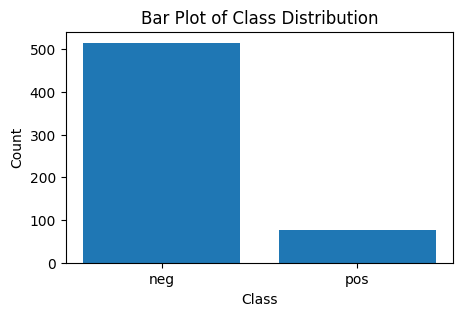

In [ ]:

import matplotlib.pyplot as plt

# Extract the 'class' column
class_data = df_copy['class']

# Create the boxplot
plt.figure(figsize=(5, 3))
plt.bar(['neg', 'pos'], class_data.value_counts())

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Class Distribution')

# Show the plot
plt.show()


podemos ver no grafico acima que a distribuição no dataframe esta desbalanceada isso pode afetar a eficiencia do modelo.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_normalized.drop('class', axis=1)
y = df_normalized['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Concatenate the resampled data into a new DataFrame
df_balanced = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Display the balanced DataFrame
print(df_balanced)


       aa_000    ab_000        ac_000    ad_000    ae_000    af_000  ag_000  \
0    0.071904  0.000000  2.759648e-07  0.065440  0.019762  0.035874     0.0   
1    0.209608  0.000000  6.392246e-07  0.090592  0.029074  0.046637     0.0   
2    0.135328  0.000000  1.351664e-07  0.033069  0.000000  0.000000     0.0   
3    0.151515  0.000000  4.702666e-07  0.086633  0.000000  0.000000     0.0   
4    0.121807  0.000000  1.000000e+00  0.052864  0.000000  0.000000     0.0   
..        ...       ...           ...       ...       ...       ...     ...   
813  0.203679  0.000000  2.478099e-07  0.174197  0.000000  0.000000     0.0   
814  0.099226  0.003082  1.162380e-08  0.000932  0.000000  0.000000     0.0   
815  0.221409  0.000000  7.684442e-07  0.158229  0.000000  0.000000     0.0   
816  0.190009  0.000000  1.856351e-06  0.334783  0.000000  0.000000     0.0   
817  0.211626  0.000000  2.071680e-06  0.541220  0.000000  0.000000     0.0   

       ag_001    ag_002    ag_003  ...    ee_003   

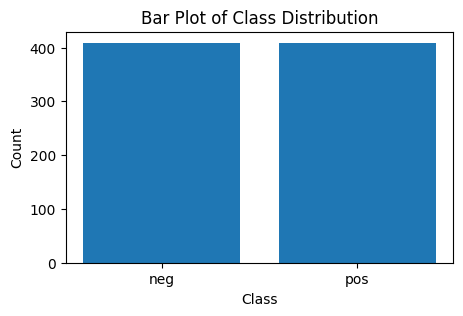

In [ ]:
# Extract the 'class' column
class_data = df_balanced['class']

# Create the boxplot
plt.figure(figsize=(5, 3))
plt.bar(['neg', 'pos'], class_data.value_counts())

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Class Distribution')

# Show the plot
plt.show()

In [ ]:
#normalizado sem grid search
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Separate features and target
X = df_normalized.drop('class', axis=1)
y = df_normalized['class']

# Split data into train and test sets
X_train, X_test3, y_train, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Train the XGBoost model
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Test the models on the test set
y_pred_gnb1 = gnb.predict(X_test)
y_pred_xgb1 = xgb.predict(X_test)
y_pred_lr1 = lr.predict(X_test)

# Calculate the confusion matrices
cm_gnb = confusion_matrix(y_test, y_pred_gnb1)
cm_xgb = confusion_matrix(y_test, y_pred_xgb1)
cm_lr = confusion_matrix(y_test, y_pred_lr1)

# Print the confusion matrices
print("GaussianNB Confusion Matrix:")
print(cm_gnb)
print("\nXGBoost Confusion Matrix:")
print(cm_xgb)
print("\nLogistic Regression Confusion Matrix:")
print(cm_lr)


GaussianNB Confusion Matrix:
[[68 38]
 [ 1 12]]

XGBoost Confusion Matrix:
[[105   1]
 [  2  11]]

Logistic Regression Confusion Matrix:
[[106   0]
 [  7   6]]


In [ ]:
#normalizado com grid search
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Separate features and target
X1 = df_normalized.drop('class', axis=1)
y1 = df_normalized['class']


# Train a XGBoost model
xgb_model1 = GradientBoostingClassifier()
xgb_model1.fit(X1, y1)

# Train a Naive Bayes model
nb_model1 = GaussianNB()
nb_model1.fit(X1, y1)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=100000000)
lr_model.fit(X1, y1)

from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
nb_param_grid = {'var_smoothing': np.logspace(0, 9, num=100)}
xgb_param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create the GridSearchCV objects
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
xgb_grid_search = GridSearchCV(GradientBoostingClassifier(), xgb_param_grid, cv=5)
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=50000000,solver='liblinear'), lr_param_grid, cv=5)

# Fit the models to the training data
nb_grid_search.fit(df_normalized.drop('class', axis=1), df_normalized['class'])
xgb_grid_search.fit(df_normalized.drop('class', axis=1), df_normalized['class'])
lr_grid_search.fit(df_normalized.drop('class', axis=1), df_normalized['class'])

# Predict on the test set
nb_predictions0 = nb_grid_search.predict(X_test)
xgb_predictions0 = xgb_grid_search.predict(X_test)
lr_predictions0 = lr_grid_search.predict(X_test)

# Create confusion matrices for each model
nb_cm = confusion_matrix(y_test, nb_predictions0)
xgb_cm = confusion_matrix(y_test, xgb_predictions0)
lr_cm = confusion_matrix(y_test, lr_predictions0)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm)
print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)


Naive Bayes Confusion Matrix:
[[104   2]
 [  8   5]]
XGBoost Confusion Matrix:
[[106   0]
 [  0  13]]
Logistic Regression Confusion Matrix:
[[106   0]
 [  0  13]]


Agora com os dados balanceados podemos treinar o modelo.
Entretanto vale resaltar que foram gerados dados sinteticos para igualar os numeros de pos e neg (SMOTE) isso pode gerar reultados menos precisos no que tange a confiabilidade da base de dados.

In [ ]:
#balanceado sem grid search
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Separate features and target
X = df_balanced.drop('class', axis=1)
y = df_balanced['class']

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

# Predict on the test set
nb_predictions = nb_model.predict(X_test)

# Create a confusion matrix for the Naive Bayes model
nb_cm = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_cm)

# Train a XGBoost model
xgb_model = GradientBoostingClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Create a confusion matrix for the XGBoost model
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("XGBoost Confusion Matrix:")
print(xgb_cm)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Create a confusion matrix for the Logistic Regression model
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)


Naive Bayes Confusion Matrix:
[[68 38]
 [ 1 12]]
XGBoost Confusion Matrix:
[[105   1]
 [  3  10]]
Logistic Regression Confusion Matrix:
[[104   2]
 [  2  11]]


In [ ]:
#base balanceada com grid search
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
nb_param_grid = {'var_smoothing': np.logspace(0, 9, num=100)}
xgb_param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create the GridSearchCV objects
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
xgb_grid_search = GridSearchCV(GradientBoostingClassifier(), xgb_param_grid, cv=5)
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=50000000,solver='liblinear'), lr_param_grid, cv=5)

# Fit the models to the training data
nb_grid_search.fit(df_balanced.drop('class', axis=1), df_balanced['class'])
xgb_grid_search.fit(df_balanced.drop('class', axis=1), df_balanced['class'])
lr_grid_search.fit(df_balanced.drop('class', axis=1), df_balanced['class'])

# Predict on the test set
nb_predictions = nb_grid_search.predict(X_test)
xgb_predictions = xgb_grid_search.predict(X_test)
lr_predictions = lr_grid_search.predict(X_test)

# Create confusion matrices for each model
nb_cm = confusion_matrix(y_test, nb_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm)
print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)


Naive Bayes Confusion Matrix:
[[100   6]
 [  7   6]]
XGBoost Confusion Matrix:
[[105   1]
 [  2  11]]
Logistic Regression Confusion Matrix:
[[101   5]
 [  1  12]]


Podemos ver que otimizar os hiperparametros melhorou o resultado dos modelos.
entretanto a utilização do grid search no modelo XGBoost demora bastante para executar.


A seguir vamos testar os modelos aqui treinados com a base air_system_present_year.

In [ ]:
df0

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


Note que ao remover os valores ausentes em ambas as bases isso reduz drasticamente o tamamho da base.

In [ ]:
df0 = df0.copy()

# Replace all occurrences of 'na' with NaN
df0.replace('na', np.NAN, inplace=True)
print (df0)
# Drop rows with NaN values, excluding the 'class' column
#df0.dropna(subset=df0.columns.difference(['class']), inplace=True)

# Print the modified DataFrame
#print(df0)
#df0

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816    NaN        1010    936      0      0      0      0   
4       neg    1814    NaN         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852    NaN  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636    NaN        1670   1518      0      0      0      0   
15998   neg     110    NaN          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 

In [ ]:

nan_rows = df0[df0.isnull().any(axis=1)]
print(f"Number of rows with NaN values: {len(nan_rows)}")


Number of rows with NaN values: 15835


In [ ]:
# Drop rows with NaN values, excluding the 'class' column
df0.dropna(subset=df0.columns.difference(['class']), inplace=True)

# Print the modified DataFrame
#print(df0)
df0

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
235,neg,119188,0,706,676,396,450,0,0,0,...,808012,493444,600214,886228,2371694,128180,3910,0,0,0
308,neg,601272,0,62,46,0,0,0,0,0,...,4032,2274,3206,3242,1848,18156,148,0,0,0
372,neg,918058,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,neg,211988,0,380,288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,pos,1172556,0,246,326,0,0,0,0,0,...,1150404,597678,1210002,1413330,1023394,116060,9216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,pos,375614,0,1770,1474,0,0,0,0,0,...,48426,20316,53420,77520,92534,236066,7316,0,0,0
15470,neg,362210,0,214,190,0,0,0,0,0,...,358694,136896,194620,74452,81732,227634,1780,0,0,0
15683,neg,180314,0,184,180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15707,neg,122188,0,2130706432,66,406,338,0,0,0,...,1095066,2413362,976058,350716,1089392,116300,776,0,0,0


In [ ]:
# testar os modelos(treinados na base normalizada balanceada sem grid search) na base df0
X0 = df0.drop('class', axis=1)
y0 = df0['class']

# Normalize the data
scaler = MinMaxScaler()
X0 = scaler.fit_transform(X0)

# Predict on the test set
nb_predictions = nb_model.predict(X0)
xgb_predictions = xgb_model.predict(X0)
lr_predictions = lr_model.predict(X0)

# Create confusion matrices for each model
nb_cm = confusion_matrix(y0, nb_predictions)
xgb_cm = confusion_matrix(y0, xgb_predictions)
lr_cm = confusion_matrix(y0, lr_predictions)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm)
print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)



Naive Bayes Confusion Matrix:
[[126   9]
 [ 14  16]]
XGBoost Confusion Matrix:
[[131   4]
 [  8  22]]
Logistic Regression Confusion Matrix:
[[133   2]
 [  4  26]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# testar os modelos(treinados na base normalizada balanceada com grid search) na base df0

# Define the models
models = [nb_grid_search, xgb_grid_search, lr_grid_search]

# Define the names of the models
model_names = ["Naive Bayes", "XGBoost", "Logistic Regression"]

# Test the models on the df0 dataset
for model, name in zip(models, model_names):
    predictions = model.predict(df0.drop('class', axis=1))

    # Create a confusion matrix for the model
    cm = confusion_matrix(df0['class'], predictions)

    # Print the confusion matrix and the model name
    print(f"{name} Confusion Matrix:")
    print(cm)



Naive Bayes Confusion Matrix:
[[ 29 106]
 [  1  29]]
XGBoost Confusion Matrix:
[[134   1]
 [ 28   2]]
Logistic Regression Confusion Matrix:
[[135   0]
 [ 29   1]]


In [ ]:
#testar os modelos(treinados na base normalizada sem balancear com grid search) na base df0

# Separate features and target
X0 = df0.drop('class', axis=1)
y0 = df0['class']

# Normalize the data
scaler = MinMaxScaler()
scaler.fit(X0)
X0 = scaler.transform(X0)

# Predict on the test set
nb_predictions0 = nb_grid_search.predict(X0)
xgb_predictions0 = xgb_grid_search.predict(X0)
lr_predictions0 = lr_grid_search.predict(X0)

# Create confusion matrices for each model
nb_cm0 = confusion_matrix(y0, nb_predictions0)
xgb_cm0 = confusion_matrix(y0, xgb_predictions0)
lr_cm0 = confusion_matrix(y0, lr_predictions0)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm0)
print("XGBoost Confusion Matrix:")
print(xgb_cm0)
print("Logistic Regression Confusion Matrix:")
print(lr_cm0)


Naive Bayes Confusion Matrix:
[[125  10]
 [  7  23]]
XGBoost Confusion Matrix:
[[134   1]
 [ 10  20]]
Logistic Regression Confusion Matrix:
[[133   2]
 [  4  26]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# testar os modelos(treinados na base normalizada sem balancear sem grid search) na base df0

# Separate features and target for df0
X0 = df0.drop('class', axis=1)
y0 = df0['class']

# Normalize the features in X0 using the same scaler used for the training data
X0_normalized = scaler.transform(X0)

# Predict using each model
nb_predictions1 = nb_model.predict(X0_normalized)
xgb_predictions1 = xgb_model.predict(X0_normalized)
lr_predictions1 = lr_model.predict(X0_normalized)

# Create confusion matrices for each model
nb_cm1 = confusion_matrix(y0, nb_predictions1)
xgb_cm1 = confusion_matrix(y0, xgb_predictions1)
lr_cm1 = confusion_matrix(y0, lr_predictions1)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm1)
print("XGBoost Confusion Matrix:")
print(xgb_cm1)
print("Logistic Regression Confusion Matrix:")
print(lr_cm1)


Naive Bayes Confusion Matrix:
[[84 51]
 [ 5 25]]
XGBoost Confusion Matrix:
[[129   6]
 [  5  25]]
Logistic Regression Confusion Matrix:
[[134   1]
 [  3  27]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#normalizado sem grid search

# Separate features and target
X_test2 = df0.drop('class', axis=1)
y_test2 = df0['class']

# Make predictions for each model
y_pred_gnb1 = gnb.predict(X_test2)
y_pred_xgb1 = xgb.predict(X_test2)
y_pred_lr1 = lr.predict(X_test2)

# Calculate confusion matrices
nb_cm = confusion_matrix(y_test2, y_pred_gnb1)
xgb_cm = confusion_matrix(y_test2, y_pred_xgb1)
lr_cm = confusion_matrix(y_test2, y_pred_lr1)

# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm)
print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)




Naive Bayes Confusion Matrix:
[[100  35]
 [  6  24]]
XGBoost Confusion Matrix:
[[67 68]
 [ 5 25]]
Logistic Regression Confusion Matrix:
[[97 38]
 [ 8 22]]


In [ ]:


#balanceado com grid search

from sklearn.metrics import confusion_matrix, classification_report

# Separate features and target
X_test2 = df0.drop('class', axis=1)
y_test2 = df0['class']

# Predict on the test set
nb_predictions2 = nb_grid_search.predict(X_test2)
xgb_predictions2 = xgb_grid_search.predict(X_test2)
lr_predictions2 = lr_grid_search.predict(X_test2)

# Create confusion matrices for each model
nb_cm = confusion_matrix(y_test2, nb_predictions2)
xgb_cm = confusion_matrix(y_test2, xgb_predictions2)
lr_cm = confusion_matrix(y_test2, lr_predictions2)
tn, fp, fn, tp = confusion_matrix(y_test2, nb_predictions).ravel()
'''# Print the confusion matrices
print("Naive Bayes Confusion Matrix:")
print(nb_cm)
print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)
'''
print(tn, fp, fn, tp)
# Print the confusion matrices with labels
print("Naive Bayes Confusion Matrix:")
print("TP  FP")
print(nb_cm[0])
print("FN  TN")
print(nb_cm[1])

print("\nXGBoost Confusion Matrix:")
print("TP  FP")
print(xgb_cm[0])
print("FN  TN")
print(xgb_cm[1])

print("\nLogistic Regression Confusion Matrix:")
print("TP  FP")
print(lr_cm[0])
print("FN  TN")
print(lr_cm[1])

# Print classification reports for each model
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test2, nb_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test2, xgb_predictions))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test2, lr_predictions))

126 9 14 16
Naive Bayes Confusion Matrix:
TP  FP
[ 29 106]
FN  TN
[ 1 29]

XGBoost Confusion Matrix:
TP  FP
[134   1]
FN  TN
[28  2]

Logistic Regression Confusion Matrix:
TP  FP
[135   0]
FN  TN
[29  1]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         neg       0.90      0.93      0.92       135
         pos       0.64      0.53      0.58        30

    accuracy                           0.86       165
   macro avg       0.77      0.73      0.75       165
weighted avg       0.85      0.86      0.86       165


XGBoost Classification Report:
              precision    recall  f1-score   support

         neg       0.94      0.97      0.96       135
         pos       0.85      0.73      0.79        30

    accuracy                           0.93       165
   macro avg       0.89      0.85      0.87       165
weighted avg       0.92      0.93      0.93       165


Logistic Regression Classification Report:
              precision    rec

Apos testar os modelos na nova base podemos concluir que o modelo de regreção logistica parece ter obtiodo a melhor capacidade de generalização. Entretanto o modelo XGBoost tambem aprenseta boa performace, ja o modelo naive bayes parece não esta funcionado bem para o nosso proposito.

Podemos ver a baixo quais foram as variaves mais relevantes para a previsão do modelo que melhor performou.

parece que uma unica variavel foi muito relevante para o treinameno do modelo.

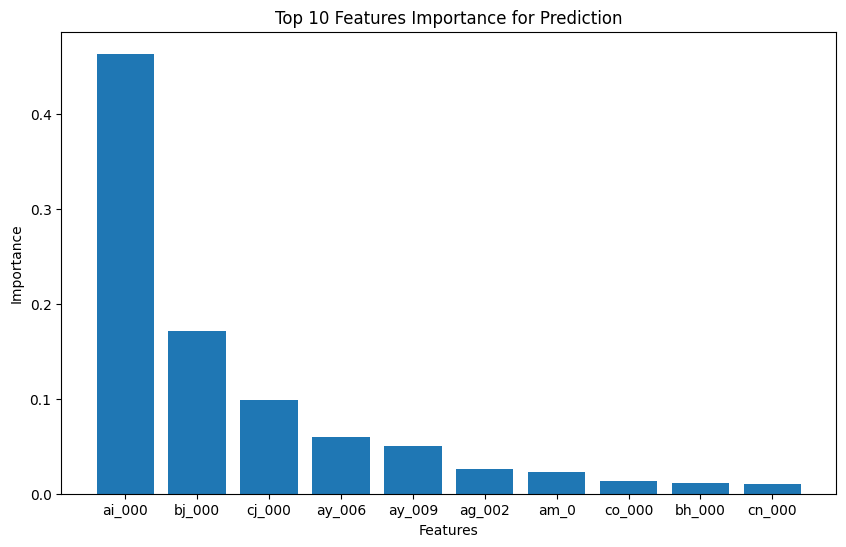

In [ ]:
# prompt: escreva um codigo que mostre em um grafico de barras as 5 variaves mais importantes para a previsao

importances = xgb_model.feature_importances_
features = X.columns

# Sort the features by importance in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Select the top 5 features
top_5_features = sorted_features[:10]
top_5_importances = sorted_importances[:10]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_features, top_5_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Features Importance for Prediction')
plt.show()


Considerações finais:
Nesse experimento testamos os algorimos de Regreçao logistica, XGBoost e Naive bayes em duas situações: em uma rodada treinamos os modelos na primeira base balanceada e testamos na primera base e na nova base sem balancear, na segunda rodada treinamos os modelos na primeira base apenas normalizada e depois testamos na nova base a seguir temos as

conclusoes:

Podemos notar que acapacidade de genralizaçao dos modelos parece ter sido comprometida em todos os cassos devido as condiçoes desfavoraveis das bases de dados fornecidas, com muitos valores ausentes e por estar desbalanceada para a classe 'neg'.

Entretanto quando nos voltamos para o foco do problema que consiste em otimizar os custos de manutenção dos caminhoes, podemos fazer algumas considerações interressates:

Entre todos os modelos o Naive bayes(com balanceamento) se destacou por conseguir evitar os valores FN melhor que os demais modelos:

Naive Bayes Confusion Matrix:
TP  FP
[ 29 106]
FN  TN
[ 1 29]

Isso é particularmente interessante para nosso problema de otimização pois:

FN representa 500 dolares de custo por caminhão reprensentando os maiores gastos com manuteção.

O problema para esse modelo é que ele é o modelo com a menor capaciadde para diferenciar positivos de negativos, mas no que tange reduzir custos de manutenção ele toma as melhores decisões.

Por outro lado de modo geral teremos:

XGBoost:
Todas as Matrizes de Confusão do XGBoost apresentam um número baixo de FN (entre 1 e 28) em comparação com os outros modelos.
Naive Bayes:
O Naive Bayes apresenta um desempenho variável em termos de FN, com resultados melhores no cenário balanceado com grid search (FN = 1).
No entanto, em outros cenários, a quantidade de FN é maior que a do XGBoost.
Logistic Regression:
A Logistic Regression apresenta um bom desempenho em termos de FN em alguns cenários (FN = 0, 1, 2), mas em outros casos, a quantidade de FN é maior que a do XGBoost.
Métricas para Minimizar FN:

A principal métrica para minimizar FN é a Revocação (Recall), também conhecida como Sensibilidade. Ela representa a proporção de casos positivos reais (defeitos nos caminhões) que o modelo classifica corretamente.

Outras Métricas Importantes:

F1 Score: Considera o equilíbrio entre Precisão (P) e Revocação (R).
Custo Total: É crucial considerar o custo de cada tipo de erro (FN e FP) ao escolher o modelo ideal. No caso em questao, o custo de um FN é significativamente maior que o de um FP (R$ 10).
Conclusão:

Com base na prioridade de minimizar os FN e considerando os resultados apresentados, o XGBoost se destaca como o melhor modelo. Ele apresenta consistentemente um número baixo de FN em todos os cenários.

Recomendação:

Utilizar o XGBoost como modelo para classificar os caminhões com defeito no sistema de ar.
Monitorar a Revocação (Recall) do modelo para garantir que ele continue identificando a maioria dos caminhões com defeito.
Calcule o Custo Total considerando os custos de FN e FP para avaliar a eficiência do modelo.








Então em minha prova tecnica de conceito relato aos responsaveis pelo projeto:

Concluo que de fato podemos reduzuir significativametne os custos de manutenção da empressa aplicando as tecnicas empregadas aqui.
Entretanto tenho algumas considerações a fazer:

Em primeiro lugar, é crucial nos atentarmos para a qualidade da base de dados que sera usada ao implementarmos esse projeto, a persistencia de muitos valores ausentes na base é um grande ponto fraco para a aplicaçao do porjeto. Por mais que algumas tecnicas possam ser aplicadas para contornar esse problema, nemhuma delas sera capaz de resolve-lo completamente. A melhor forma de garantir a eficienca dos modelos é pormeio de dados confiaveis.

Alem disso devemos sempre ficar atentos a possives out liers na base de dados para evitar discrepancias nas previsoes.
